# Visual Parameter Tuning with Facebook Prophet

Bryant Crocker

I'll start be importing the necessary libraries for this anaylsis and getting some Nike stock data.  

In [6]:
import pandas as pd 
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns 
# Python
import pandas as pd
import quandl
from fbprophet import Prophet
from fbprophet.plot import plot_cross_validation_metric 
from fbprophet.diagnostics import performance_metrics
from fbprophet.diagnostics import cross_validation
# Get some NKE stock data 
pd.core.common.is_list_like = pd.api.types.is_list_like
import ffn
import fix_yahoo_finance as yf
#this makes fix yahoo finance work
yf.pdr_override()
mydata = yf.download('^RUT', start="2012-01-01")
RUT = mydata[['Adj Close']]
%matplotlib inline 
plt.style.use('seaborn')
font = {'weight':'normal','size':20}
matplotlib.rc('font', **font)
matplotlib.rc('figure', figsize=(8.0, 6.0))
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16) 
matplotlib.rc('legend',**{'fontsize':16})
plt.rcParams.update({'axes.titlesize': 'Large'})
plt.rcParams.update({'axes.labelsize': 'Large'})

[*********************100%***********************]  1 of 1 downloaded


We can quickly see that in general, the Russel 2000 has trended upward - but recently there have been some large losses in the market.

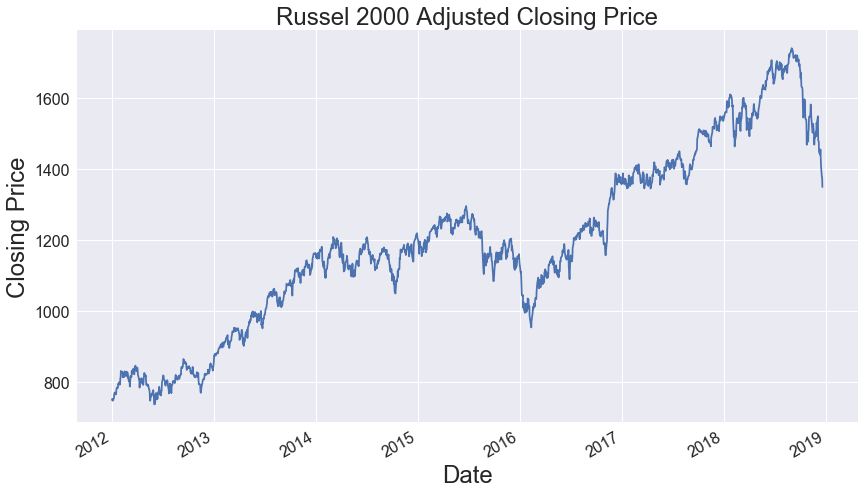

In [7]:
fix, ax = plt.subplots(1,1,figsize = (14,8))
RUT.plot(ax = ax, legend = False)
ax.set_title('Russel 2000 Adjusted Closing Price')
ax.set_ylabel('Closing Price')
ax.set_xlabel('Date')
plt.savefig('russel2000.png')
plt.show()

I loop over a number of different values for the change_point_prior_scale and plot the MAPE for each change_point_prior scale value.  I use the time series cross valadation to show how this changes over time.  It is clear from these figures that changing prophets hyperparemeters do not make a big differnce.  This makes sense because in a bayesian analysis with a decently sized dataset, the prior should give little influence. 

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.diagnostics:Making 11 forecasts with cutoffs between 2013-01-14 00:00:00 and 2017-12-19 00:00:00
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.diagnostics:Making 11 forecasts with cutoffs between 2013-01-14 00:00:00 and 2017-12-19 00:00:00
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.diagnostics:Making 11 forecasts with cutoffs between 2013-01-14 00:00:00 and 2017-12-19 00:00:00
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.diagnostics:Making 11 forecasts with cutoffs between 2013-01-14 00:00:00 and 2017-12-19 00:00:00
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to ov

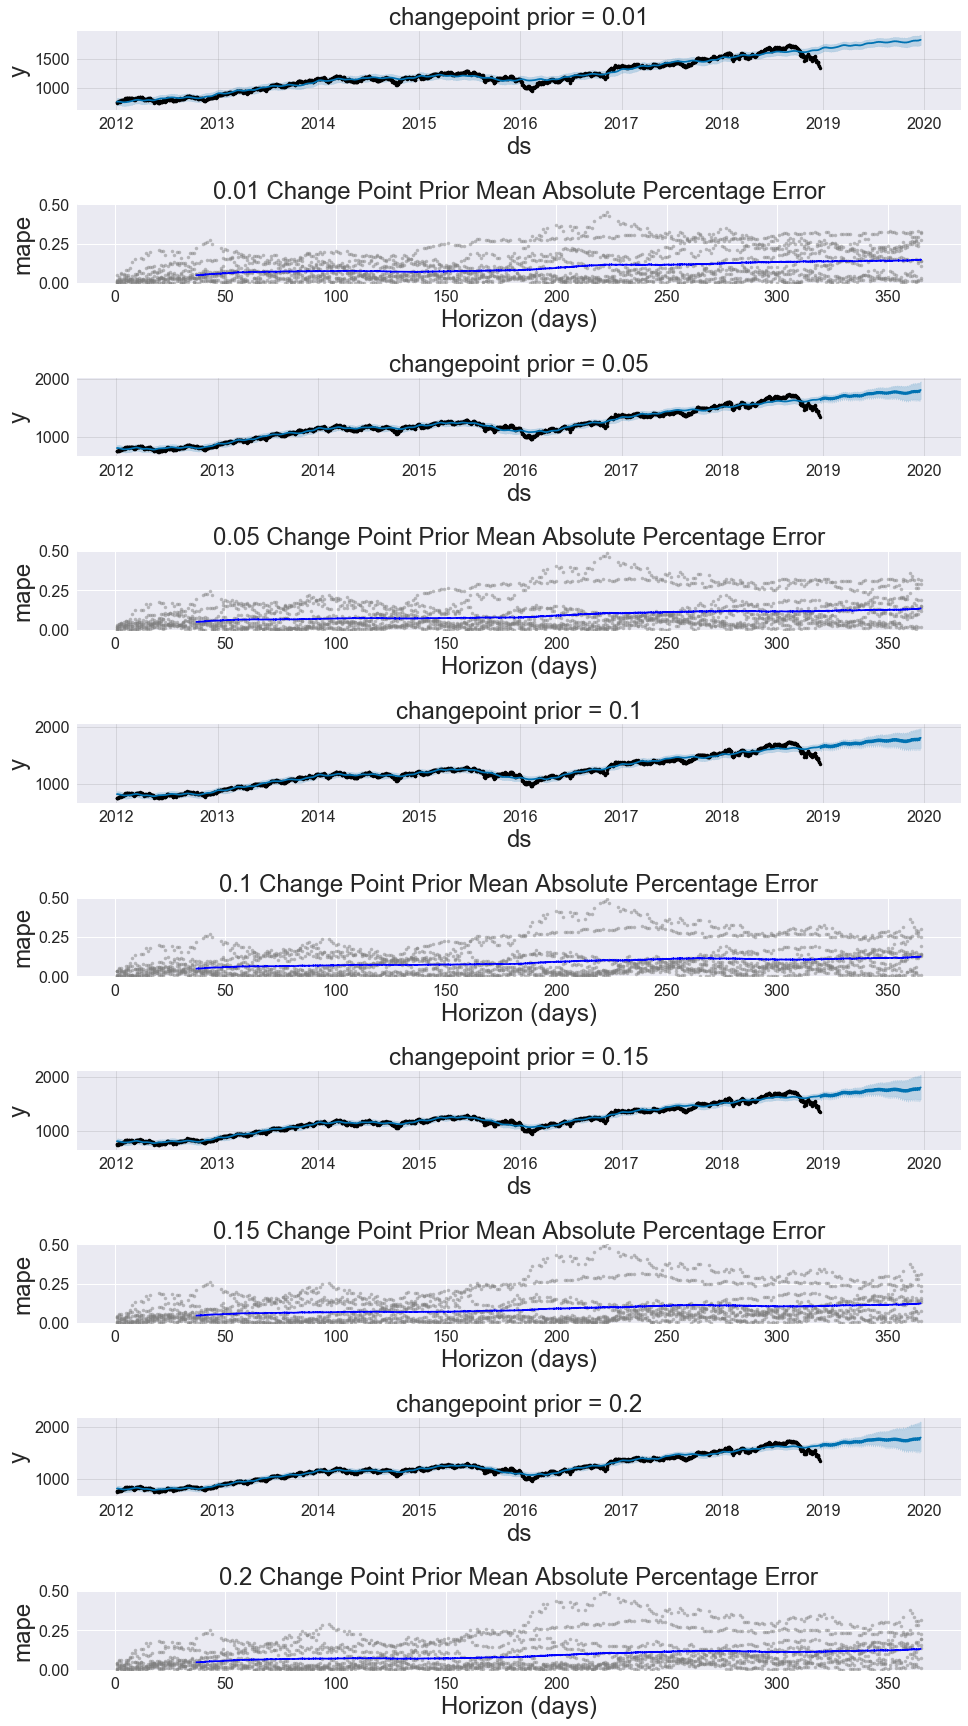

In [11]:
fig, ax = plt.subplots(10,1, figsize = (14, 24))
ax = ax.ravel()
j = 0
for i in [0.01, 0.05, 0.10, 0.15, 0.20]:
    RUT2 = RUT.reset_index()
    RUT2 = RUT2.rename(columns = {'Date' : 'ds', 'Adj Close' : 'y'} )
    m = Prophet(changepoint_prior_scale=i)
    #fit the prophet model on the data
    m.fit(RUT2)
    # make a dataframe of the next two years 
    future = m.make_future_dataframe(periods=365)
    #predict on this future dataframe
    forecast = m.predict(future)
    # plot the forecast 
    fig = m.plot(forecast, ax = ax[j])
    ax[j].set_title('changepoint prior = ' + str(i))
    j += 1
    df_cv = cross_validation(m, initial='365 days', period='180 days', horizon = '365 days')
    df_p = performance_metrics(df_cv)
    fig = plot_cross_validation_metric(df_cv, metric='mape', ax = ax[j])
    ax[j].set_title(str(str(i) + ' Change Point Prior Mean Absolute Percentage Error'))
    ax[j].set_ylim(0,0.5)
    j += 1
plt.savefig('ProphetTune.png')

The default prior 0.05 performed the best based on time series cross valadation.  This tends to happen with the prophet package.  This is nice, because it means that the user can produce a good forecast without having to tune hyperparameters. 